<a href="https://colab.research.google.com/github/foglianon/ProyectoMachineLearning/blob/main/Entrega_Nicolas_Fogliano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preguntas de interes**

* Cuales son las edades donde se encuentran mayores casos de enfermedades cardiacas?
* Algun sexo tiene mayores probabilidades de contraer una enfermedad cardiaca?
* Que etnia tiene mayor porcentaje de enfermedades cardiacas y cual tiene menor?

**Contexto**

El objetivo del siguiente proyecto es analizar las posibilidades de sufrir un ataque cardíaco considerando diversos antecedentes de salud. Esto incluye evaluar factores como el índice de masa corporal (BMI), hábitos de fumar y consumo de alcohol, historial de accidentes cerebrovasculares, salud física y mental, dificultad para caminar, edad, sexo, actividad física, salud general, tiempo de sueño, y antecedentes de enfermedades crónicas como diabetes, asma, enfermedades renales y cáncer de piel. Mediante el uso de técnicas de machine learning, se buscará identificar las variables más influyentes y predecir el riesgo de enfermedad cardíaca en individuos basándose en sus perfiles de salud.


#**Importacion de Librerias**

In [248]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
import xgboost as xgb

# Data Acquisition

In [193]:
url = 'https://raw.githubusercontent.com/foglianon/ProyectoMachineLearning/main/Dataset/Enfermedad_cardiaca.csv'
df = pd.read_csv(url,sep=',')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [194]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')



1.   HeartDisease : Encuestados que alguna vez informaron haber tenido enfermedad coronaria (CHD) o infarto de miocardio (IM)(Yes, No)
2.   BMI : Body Mass Index (BMI)
3.   Smoking : Fumó al menos 100 cigarrillos (Yes, No)
4.   AlcoholDrinking: hombres adultos que beben más de 14 tragos por semana y mujeres adultas que beben más de 7 tragos por semana (Yes, No)
5.   Stroke: encuestados que alguna vez tuvieron un accidente cerebrovascular (Yes, No)
6.   PhysicalHealth: días en los que el encuestado no tiene buena salud física (0 a 30 días)
7.   MentalHealth: días en los que el encuestado no tiene buena salud mental (0 a 30 días)
8.   DiffWalking: tiene problemas graves para caminar o subir escaleras (Yes, No)
9.   Sex: masculino (Male) o femenino (Female)
10.  AgeCategory: categoría de edad de catorce niveles (de 18 años en adelante)
11.  Race: = etnia
12.  Diabetic: estado de diabetes (No, Yes, No(borderline diabetes), Yes(during pregnancy))
13.  PhysicalActivity: adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual (Yes, No)
14.   GenHealth: estado de salud general del encuestado (Very good, Good, Excellent, Fair, Poor)
15.   SleepTime En promedio, ¿cuántas horas de sueño en un período de 24 horas?
16.   Asthma: los encuestados alguna vez dijeron que tenían asma (Yes, No)
17.   KidneyDisease: los encuestados alguna vez dijeron que tenían una enfermedad renal, excluyendo cálculos renales, infección de vejiga o incontinencia (Yes, No)
18.   SkinCancer: los encuestados alguna vez dijeron que tenían cáncer de piel (Yes, No)


In [195]:
df.shape

(319795, 18)

La base utilizada tiene 319795 filas y 18 columnas

In [196]:
df.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


# Data Wrangling

In [197]:
# Verificar cantidad de duplicados

print("Cantidad de duplicados: ", [df.duplicated().sum()])

# Calcular porcentaje de duplicados
percent_duplicated = df.duplicated().sum() * 100 / len(df)
print("Porcentaje de duplicados: ", percent_duplicated)

Cantidad de duplicados:  [18078]
Porcentaje de duplicados:  5.652996450851327




*   Se encontraron 18078 lineas duplicadas de 319795. Se decide eliminar duplicados considerando que estos solo corresponden al 5,65% del total del dataset



In [198]:
# Eliminar duplicados del dataframe
df = df.drop_duplicates()
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Exploratory Data Analysis (EDA)

In [250]:
df.HeartDisease.value_counts()

,count
HeartDisease,
No,274456
Yes,27261


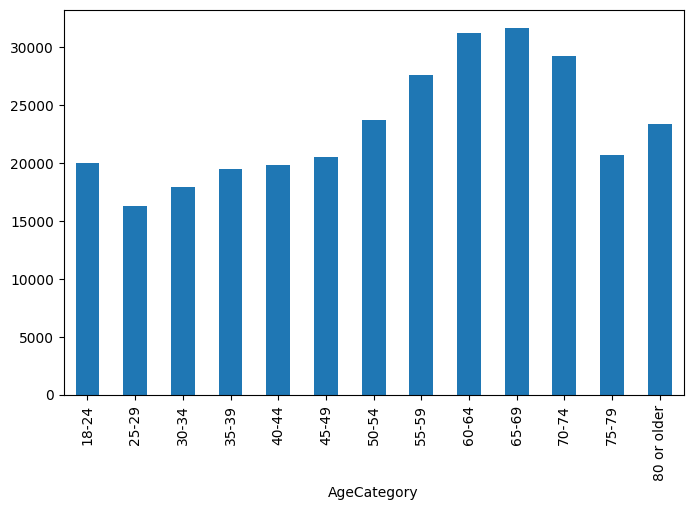

In [252]:
plt.figure(figsize = (8,5))
df.groupby("AgeCategory").size().plot(kind="bar");

Se grafico la cantidad de personas encuestadas dependiendo los rangos de edad para validar que la informacion este distribuida en todas las categorias para un posterior analisis

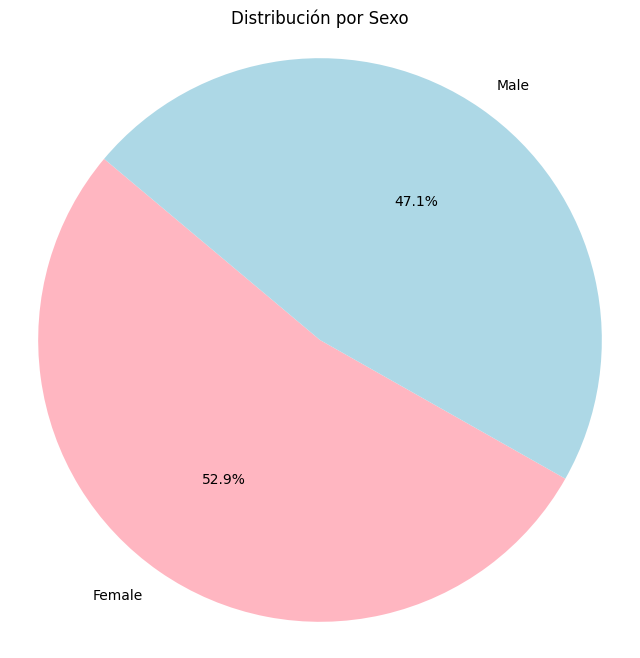

In [201]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'lightblue'])
plt.title('Distribución por Sexo')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

In [202]:
# Agrupar variables en categoricas y numericas
categoricas = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'AgeCategory',
                'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

numericas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [203]:
df[numericas].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000




*   Se logra identificar que tanto BMI como SleepTime tienen una distribucion normal ya que la media y la mediana son casi el mismo valor

*   En el caso de PhysicalHealth y MentalHealth hay varios valores entre 0 y 30 que luego se analizara si son outliers o no


## Identificacion de Outliers

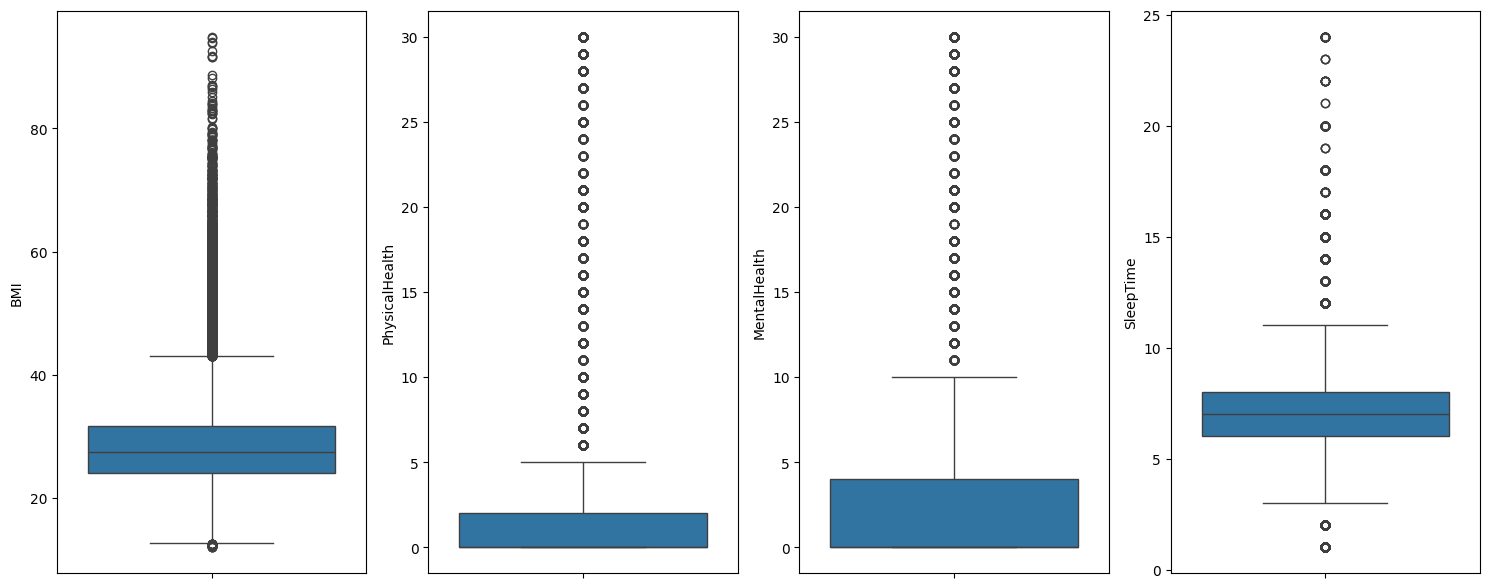

In [13]:
fig, axes = plt.subplots(1, len(numericas), figsize=(15,6))

for ax, variable in zip(axes, numericas):
    ax = sns.boxplot( y=variable, data=df, ax=ax)

plt.tight_layout()

In [271]:
df_outliers_sueño = df[df['SleepTime'] > 12]
df_outliers_sueño.shape

(999, 18)

Se deciden excluir todos aquellos casos donde las horas de sueño superan las 12 considerandose un outlier

In [272]:
df = df[df['SleepTime'] <= 12]
df.shape

(300718, 18)

## Normalizacion de Dataframe

Se normalizan los datos previo al analisis de correlacion

In [204]:
df_normalizado = df.copy()
df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [205]:
# Se normalizan todas aquellas columnas donde contienen Yes o No

Dict_y_n = {
    'Yes':1,
    'No':0
}

for columnYN in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df_normalizado[columnYN] = df_normalizado[columnYN].map(Dict_y_n).copy()

df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,No,0,Good,12.0,0,0,0


Se reemplaza en todas aquellas columnas que contenian Yes y No como valor, el Yes por '1' y No por '0'

In [206]:
# Se normaliza la columna de Sexo

dict_sex = {
    'Male':1,
    'Female':0
}

df_normalizado['Sex'] =df_normalizado['Sex'].map(dict_sex)
df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,Good,12.0,0,0,0


Se reemplaza sexo masculino por '1' y femenino por '0'

In [207]:
# Se normaliza la variable de edad
dict_age = {
    '18-24' :1,
    '25-29' :2,
    '30-34' :3,
    '35-39' :4,
    '40-44' :5,
    '45-49' :6,
    '50-54' :7,
    '55-59' :8,
    '60-64' :9,
    '65-69' :10,
    '70-74' :11,
    '75-79' :12,
    '80 or older' :13,

}

df_normalizado['AgeCategory'] = df_normalizado['AgeCategory'].map(dict_age)
df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,Hispanic,No,0,Good,12.0,0,0,0


Se normaliza el campo categoria de edad por datos numericos para facilitar el futuro modelado asi como tambien el campo de estado de salud

In [208]:
# Normalizacion de estado de salud
dict_salud = {
    'Poor' :1,
    'Fair' :2,
    'Good' :3,
    'Very good' :4,
    'Excellent' :5,
}

df_normalizado['GenHealth'] = df_normalizado['GenHealth'].map(dict_salud)
df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,White,Yes,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,White,No,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,White,Yes,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,White,No,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,White,No,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,Hispanic,Yes,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,Hispanic,No,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,Hispanic,No,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,Hispanic,No,0,3,12.0,0,0,0


In [209]:
# Normalizacion de columnas Race y Diabetic

onehot_columns = ['Race', 'Diabetic']
df_normalizado = pd.get_dummies(df_normalizado, columns = onehot_columns)
df_normalizado

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,8,...,False,False,False,False,False,True,False,False,True,False
1,0,20.34,0,0,1,0.0,0.0,0,0,13,...,False,False,False,False,False,True,True,False,False,False
2,0,26.58,1,0,0,20.0,30.0,0,1,10,...,False,False,False,False,False,True,False,False,True,False
3,0,24.21,0,0,0,0.0,0.0,0,0,12,...,False,False,False,False,False,True,True,False,False,False
4,0,23.71,0,0,0,28.0,0.0,1,0,5,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,...,False,False,False,True,False,False,False,False,True,False
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,...,False,False,False,True,False,False,True,False,False,False
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,...,False,False,False,True,False,False,True,False,False,False
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,...,False,False,False,True,False,False,True,False,False,False


Se utiliza OneHot encoding para generar nuevas columnas booleanas en base a las columnas de etnia y diabetes

## Analisis de correlacion de Dataframe Normalizado

In [210]:
df_normalizado.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,0.074435,0.239259,...,0.006480,-0.032841,-0.014517,-0.040680,-0.006076,0.048892,-0.165966,0.013793,0.178917,-0.015508
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,0.024200,-0.006069,...,0.024378,-0.081949,0.077074,0.019804,0.009565,-0.041448,-0.203952,0.047106,0.199859,0.006676
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,0.087514,0.128259,...,0.034035,-0.064314,-0.044215,-0.073012,0.013278,0.083659,-0.048180,0.004426,0.052500,-0.007271
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,0.006824,-0.060761,...,-0.005970,-0.024323,-0.029654,-0.018975,0.003102,0.040372,0.063882,-0.010214,-0.063708,-0.005308
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,-0.001343,0.141537,...,0.012800,-0.017760,0.022010,-0.028920,0.003676,0.006864,-0.098923,0.009484,0.105108,-0.005574
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,-0.038427,0.114623,...,0.019960,-0.039036,0.005113,-0.011764,0.011739,0.008125,-0.145269,0.017889,0.151242,-0.003011
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,-0.098916,-0.158608,...,0.015051,-0.027199,0.004008,0.004558,0.026678,-0.011455,-0.021528,0.007045,0.015977,0.016415
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,-0.067335,0.250407,...,0.022220,-0.042431,0.034050,-0.014040,0.004362,-0.004359,-0.202817,0.028607,0.210911,-0.009166
Sex,0.074435,0.024200,0.087514,0.006824,-0.001343,-0.038427,-0.098916,-0.067335,1.000000,-0.060620,...,-0.002520,0.015255,-0.036063,-0.001457,0.010701,0.013556,0.000275,-0.003006,0.024423,-0.087183
AgeCategory,0.239259,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,-0.060620,1.000000,...,-0.025453,-0.084699,-0.035210,-0.163452,-0.062176,0.196541,-0.210426,0.050038,0.216755,-0.034716


<Axes: >

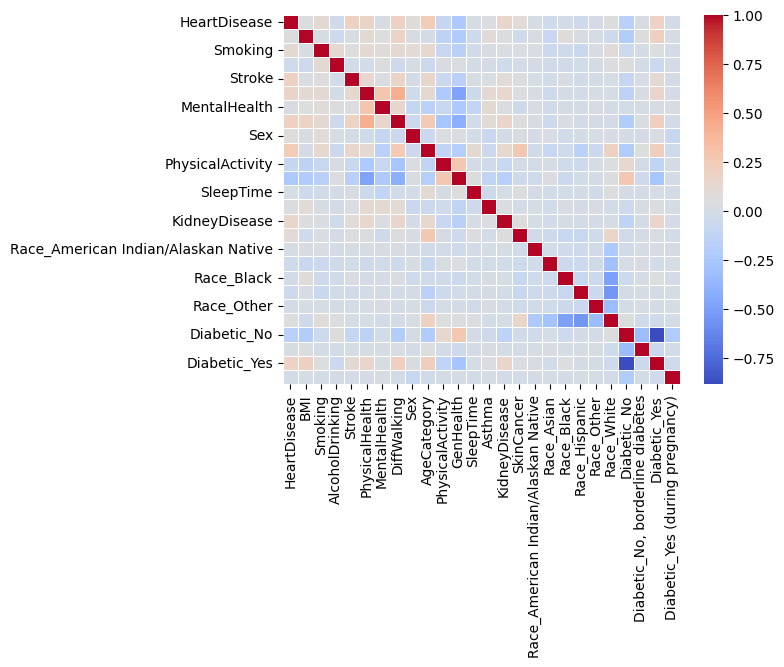

In [211]:
sns.heatmap(df_normalizado.corr(),cmap= 'coolwarm', linewidth=.5)


Las variables que muestran las correlaciones más significativas con la enfermedad cardíaca son la edad, la dificultad para caminar, el accidente cerebrovascular, la salud física y la diabetes. Esto sugiere que los factores que afectan la salud física y la movilidad, así como la presencia de otras condiciones cardiovasculares y diabetes, son indicadores importantes del riesgo de enfermedad cardíaca.

# Respuestas a preguntas de interes

---
### **Cuales son las edades donde se encuentran mayores casos de enfermedades cardiacas?**


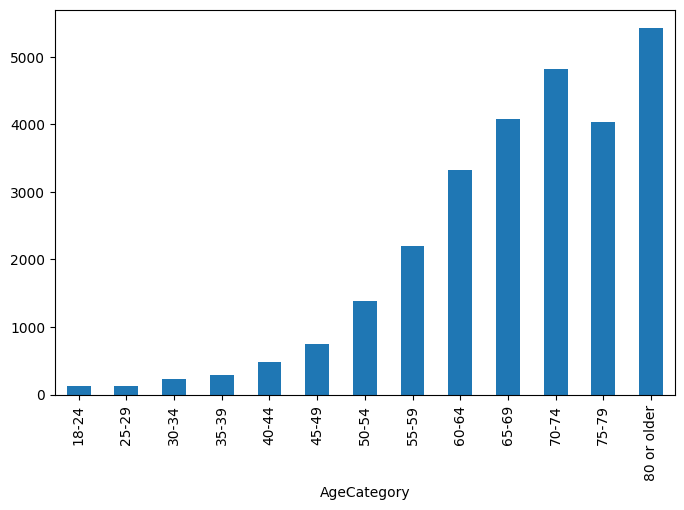

In [212]:
df_HeartDisease = df[df['HeartDisease'] == 'Yes']
plt.figure(figsize = (8,5))
df_HeartDisease.groupby("AgeCategory").size().plot(kind="bar");

a medida que la edad aumenta también aumentan las posibilidades de una enfermedad cardiaca, encontrando la mayoría de los casos a partir de los 60 años

---
### **Algun sexo tiene mayores probabilidades de contraer una enfermedad cardiaca?**

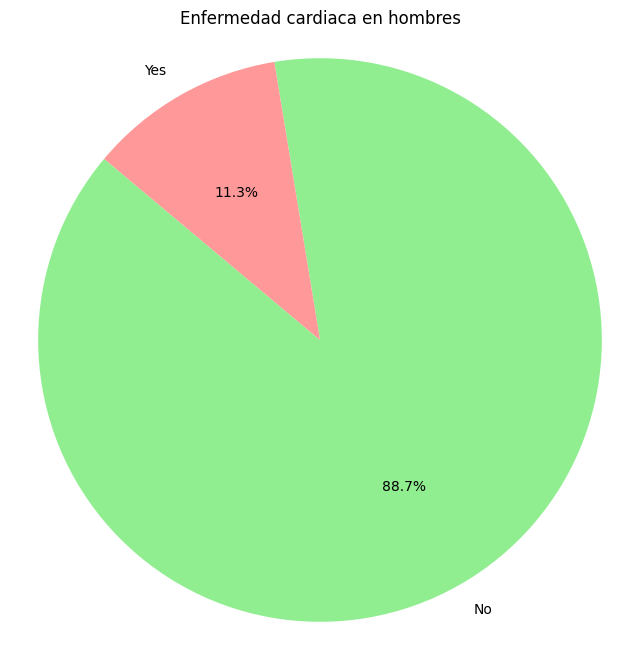

In [213]:
df_male = df[df['Sex'] == 'Male']

df_heartdiseaseMale = df_male['HeartDisease'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(df_heartdiseaseMale, labels=df_heartdiseaseMale.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', '#ff9999'])
plt.title('Enfermedad cardiaca en hombres')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

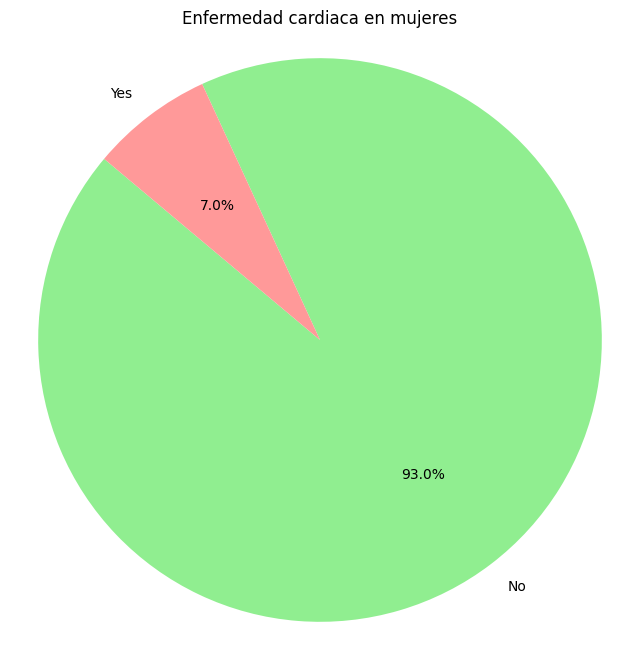

In [214]:
df_female = df[df['Sex'] == 'Female']
df_heartdiseaseFemale = df_female['HeartDisease'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(df_heartdiseaseFemale, labels=df_heartdiseaseFemale.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', '#ff9999'])
plt.title('Enfermedad cardiaca en mujeres')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

en el caso de los hombres hay un porcentaje mayor de casos de enfermedad cardiaca

---
### **Que etnia tiene mayor porcentaje de enfermedades cardiacas y cual tiene menor?**

HeartDisease                           No        Yes
Race                                                
American Indian/Alaskan Native  89.560863  10.439137
White                           90.165727   9.834273
Other                           91.864843   8.135157
Black                           92.419991   7.580009
Hispanic                        94.676652   5.323348
Asian                           96.672088   3.327912


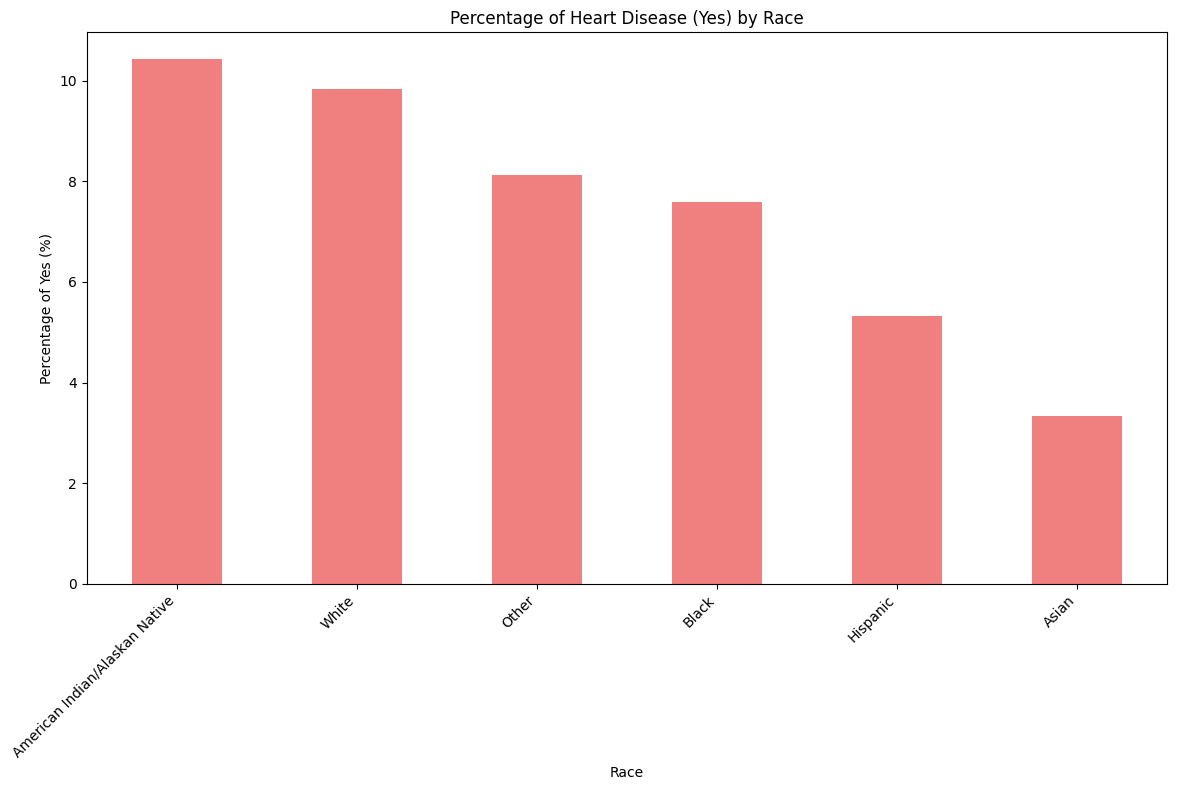

In [215]:
# Crear una tabla de contingencia
race_heart_disease = pd.crosstab(df['Race'], df['HeartDisease'])

# Calcular los porcentajes
race_heart_disease_percent = race_heart_disease.div(race_heart_disease.sum(axis=1), axis=0) * 100

# Mostrar el resultado
race_heart_disease_percent_order = race_heart_disease_percent.sort_values(by='Yes', ascending=False)

print(race_heart_disease_percent_order)

plt.figure(figsize=(12, 8))
race_heart_disease_percent_order['Yes'].plot(kind='bar', color='lightcoral')
plt.xlabel('Race')
plt.ylabel('Percentage of Yes (%)')
plt.title('Percentage of Heart Disease (Yes) by Race')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visibilidad
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

la etnia con mayor porcentaje de casos positivos en enfermedades cardiacas es American indian/Alaskan Native.
Por otro lado la que tiene menor porcentaje es Asian

# Conclusiones luego del analisis exploratorio

**Conclusiones**

El análisis centrado en la presencia de enfermedades cardíacas revela varias tendencias y correlaciones importantes que pueden ayudar a comprender mejor los factores de riesgo asociados con estas afecciones.
Correlaciones Significativas:
Edad: Existe una fuerte correlación entre la edad y la presencia de enfermedades cardíacas, lo que indica que a medida que aumenta la edad, también lo hace el riesgo de sufrir estas enfermedades.
Condiciones de Salud Previas: Factores como la diabetes y dificultades para caminar presentan correlaciones significativas con la presencia de enfermedades cardíacas. Esto sugiere que las personas con estas condiciones tienen un mayor riesgo.
Hábitos de Vida: El hábito de fumar muestra una correlación positiva con la enfermedad cardíaca, lo que subraya la importancia de los hábitos saludables en la prevención de estas enfermedades.
Distribuciones por etnia:
El análisis de la distribución por etnia mostró diferencias en los porcentajes de enfermedades cardíacas, con algunas etnias presentando una mayor prevalencia que otras. Estos hallazgos podrían ayudar a orientar políticas de salud pública más específicas y efectivas.
Género:
La prevalencia de enfermedades cardíacas varía ligeramente entre hombres y mujeres, con una tendencia a ser ligeramente mayor en hombres. Esta observación es consistente con estudios previos que indican diferencias de género en los factores de riesgo cardiovascular.
Impacto de la Salud Mental:
La salud mental también está correlacionada con la enfermedad cardíaca. Las personas que reportan mala salud mental tienen una mayor prevalencia de enfermedades cardíacas, lo que sugiere una conexión importante entre el bienestar mental y la salud cardiovascular.


# Modelado de Machine Learning


## Regresion Logistica

In [216]:
logisticRegr = LogisticRegression()

#Separamos en train y test!
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.3,random_state=123)

In [217]:
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [218]:
y_train_pred= logisticRegr.predict(X_train)
y_test_pred = logisticRegr.predict(X_test)

In [219]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy en set de entrenamiento:', train_accuracy)
print('Accuracy en set de evaluación:',test_accuracy)

Accuracy en set de entrenamiento: 0.9108006117395278
Accuracy en set de evaluación: 0.9106235361704008


In [220]:
# Evaluamos la precision del modelo
print("Accuracy score:",accuracy_score(y_test,y_test_pred))
print("Precision score:",precision_score(y_test, y_test_pred))
print("Recall score:",recall_score(y_test, y_test_pred))
print("f1 score:",f1_score(y_test, y_test_pred))

Accuracy score: 0.9106235361704008
Precision score: 0.525
Recall score: 0.11298606016140866
f1 score: 0.18595290802978467


## Random Forest

In [221]:
#Separamos en X e y
X = df_normalizado.drop(["HeartDisease"], axis=1)
y = df_normalizado["HeartDisease"]

In [222]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [223]:
y_train_pred= model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [224]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy en set de entrenamiento:', train_accuracy)
print('Accuracy en set de evaluación:',test_accuracy)

Accuracy en set de entrenamiento: 0.9974289894460727
Accuracy en set de evaluación: 0.8984047019311503


In [225]:
# Evaluamos la precision del modelo
print("Accuracy score:",accuracy_score(y_test,y_test_pred))
print("Precision score:",precision_score(y_test, y_test_pred))
print("Recall score:",recall_score(y_test, y_test_pred))
print("f1 score:",f1_score(y_test, y_test_pred))

Accuracy score: 0.8984047019311503
Precision score: 0.31063988095238093
Recall score: 0.10210320371729029
f1 score: 0.15369041045462908


## XGBoost

In [226]:
#Separamos en X e y
X = df_normalizado.drop(["HeartDisease"], axis=1)
y = df_normalizado["HeartDisease"]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [228]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=42,max_depth=6, learning_rate=0.01)

In [229]:
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [230]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

In [231]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy en set de entrenamiento:', train_accuracy)
print('Accuracy en set de evaluación:',test_accuracy)

Accuracy en set de entrenamiento: 0.9097537835631989
Accuracy en set de evaluación: 0.9092204693092933


In [232]:
confusion_matrix(y_test_pred,y_test)

array([[54866,  5478],
       [    0,     0]])

## Mejora de modelo

### Grid Search

In [276]:
# Definir hyper parametros
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Imprimir los resultados para los mejores hyperparametros
print("Mejores hyperparametros: ", grid_search.best_params_)
print("Mejor score: ", grid_search.best_score_)

Mejores hyperparametros:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
Mejor score:  0.9116719775023239


### Randomized search

In [277]:
# Definir hyper parametros
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Entrenar el modelo
random_search.fit(X_train, y_train)

# Imprimir los resultados para los mejores hyperparametros
print("Mejores hyperparametros: ", random_search.best_params_)
print("Mejor score: ", random_search.best_score_)

Mejores hyperparametros:  {'learning_rate': 0.03170106855134457, 'max_depth': 4, 'n_estimators': 178, 'subsample': 0.6178498120170534}
Mejor score:  0.9116885501708516
